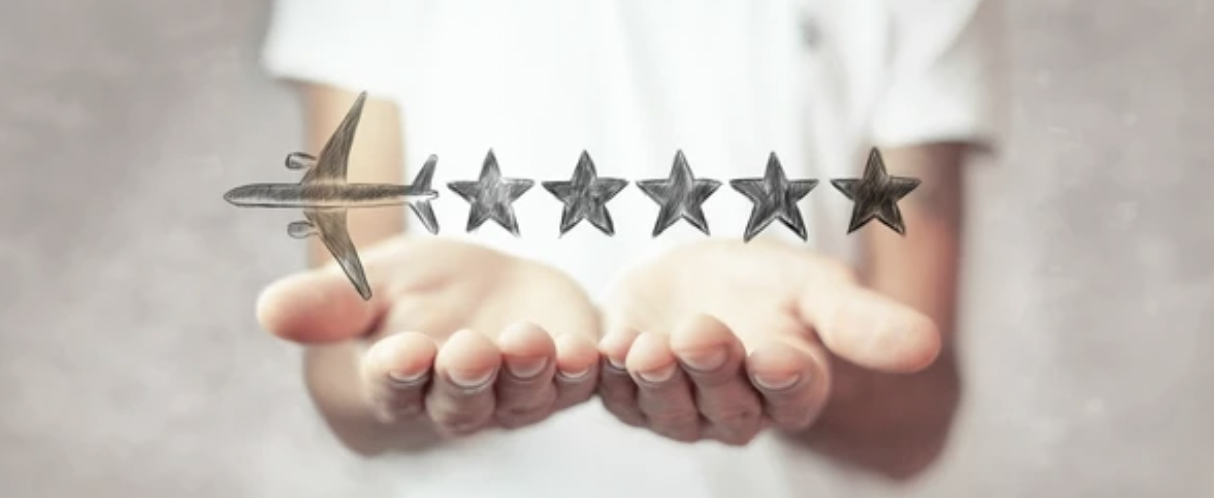

# **AIRLINE CUSTOMER SATISFACTION**

# **1. Introduction**


The project focuses on predicting airline passenger satisfaction using machine learning models. The goal is to develop a well-performing model that can classify whether a passenger is satisfied or not, based on multiple features provided in the dataset.

We aim to:

Preprocess the dataset.
Select the most important features.
Train and evaluate multiple machine learning models (RandomForest, Logistic Regression, SVM, and XGBoost).
Tune hyperparameters to achieve the best possible performance.
Analyze feature importance for interpretability.

# **2. Goal of the Project**

The main objective is to build a machine learning model that can accurately predict airline passenger satisfaction, using various feature engineering techniques and machine learning models. The performance of the model will be evaluated using metrics such as accuracy, precision, recall, and F1-score.

# **3. Data Story**

The dataset contains information about airline passengers' satisfaction levels and other related features such as customer type, flight distance, and seat comfort. We will preprocess the data, handle missing values, and encode categorical variables to make them ready for machine learning algorithms. Outliers and skewed data will also be addressed.


# **4. Process Overview**

The following are the key steps involved in the project:

**Data Preprocessing**: Handling missing values, correcting skewness, and encoding categorical features.

**Feature Selection**: Selecting the most important features using statistical methods.

**Model Building and Evaluation**: Training multiple models and evaluating their performance.

**Model Tuning**: Optimizing the hyperparameters of the models using RandomizedSearchCV.

**Final Evaluation**: Checking model generalization with cross-validation and analyzing feature importance.


# **Code and Explanation**

**Importing Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

Explanation:

 The libraries required for data manipulation (pandas, numpy), model training (RandomForest, SVM, etc.), evaluation, and plotting are imported.

**Loading the Dataset**

In [2]:
# Step 1: Load the dataset
file_path = '/content/airline_passenger_satisfaction.csv'  # Replace with the correct path
df = pd.read_csv(file_path)


Explanation:

The dataset is loaded from a CSV file. We will now inspect it.

**Inspecting the Dataset**


In [3]:
# Step 2: Inspect the dataset
print(df.head())  # Display first few rows
print(df.info())  # Show data types and missing values
print(df.describe())  # Summary statistics for numerical columns

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

Explanation:

df.head() gives a preview of the first few rows.
df.info() shows data types and missing values.
df.describe() provides summary statistics for numerical columns.

This code block helps you understand the dataset by loading it, checking the first few rows, and examining the data types and summary statistics

# **2. Data Preprocessing**

Before performing any analysis, it's essential to clean the dataset and handle any inconsistencies. We'll check for missing values, outliers, and apply transformations as needed.
In this step, we will:
Handle missing values Perform outlier detection using boxplots Analyze skewness using histograms and the skew() function



In [4]:
# Step 3: Check for missing values in the dataset
# This will show the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-

# **Handling Missing Values**

In [5]:
# Step 4: Handle missing values by dropping rows with NaN
df = df.dropna()
df.isnull().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


Explanation:

After checking for missing values, we decide on how to handle them. In this case, missing values are dropped, but depending on the dataset, imputing them may be a viable option.

# **Boxplots to Detect Outliers**


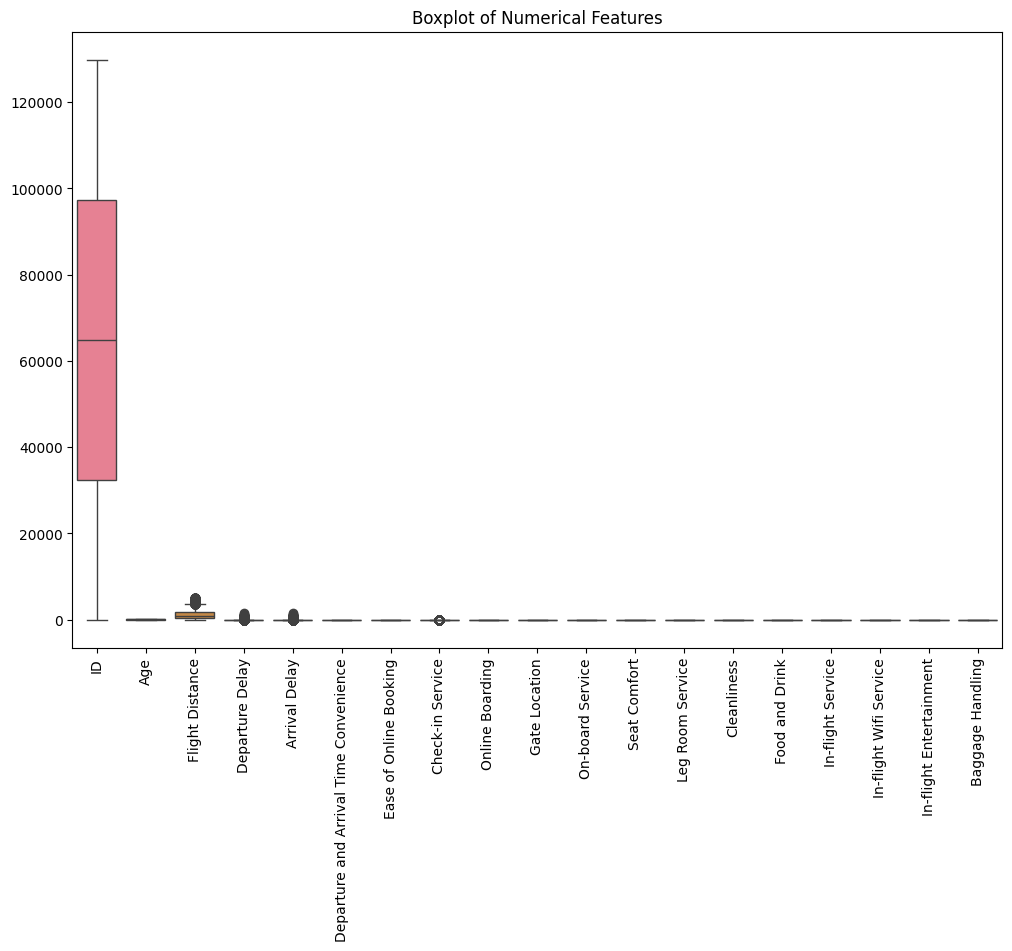

In [6]:
# Step 5: Visualize outliers with boxplots for numerical columns
# Create a boxplot to detect potential outliers in numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features')
plt.show()



Explanation:

Boxplots help identify outliers in the dataset. Outliers can distort the analysis, so it's important to detect and handle them.


# **Histograms to Visualize Distributions**

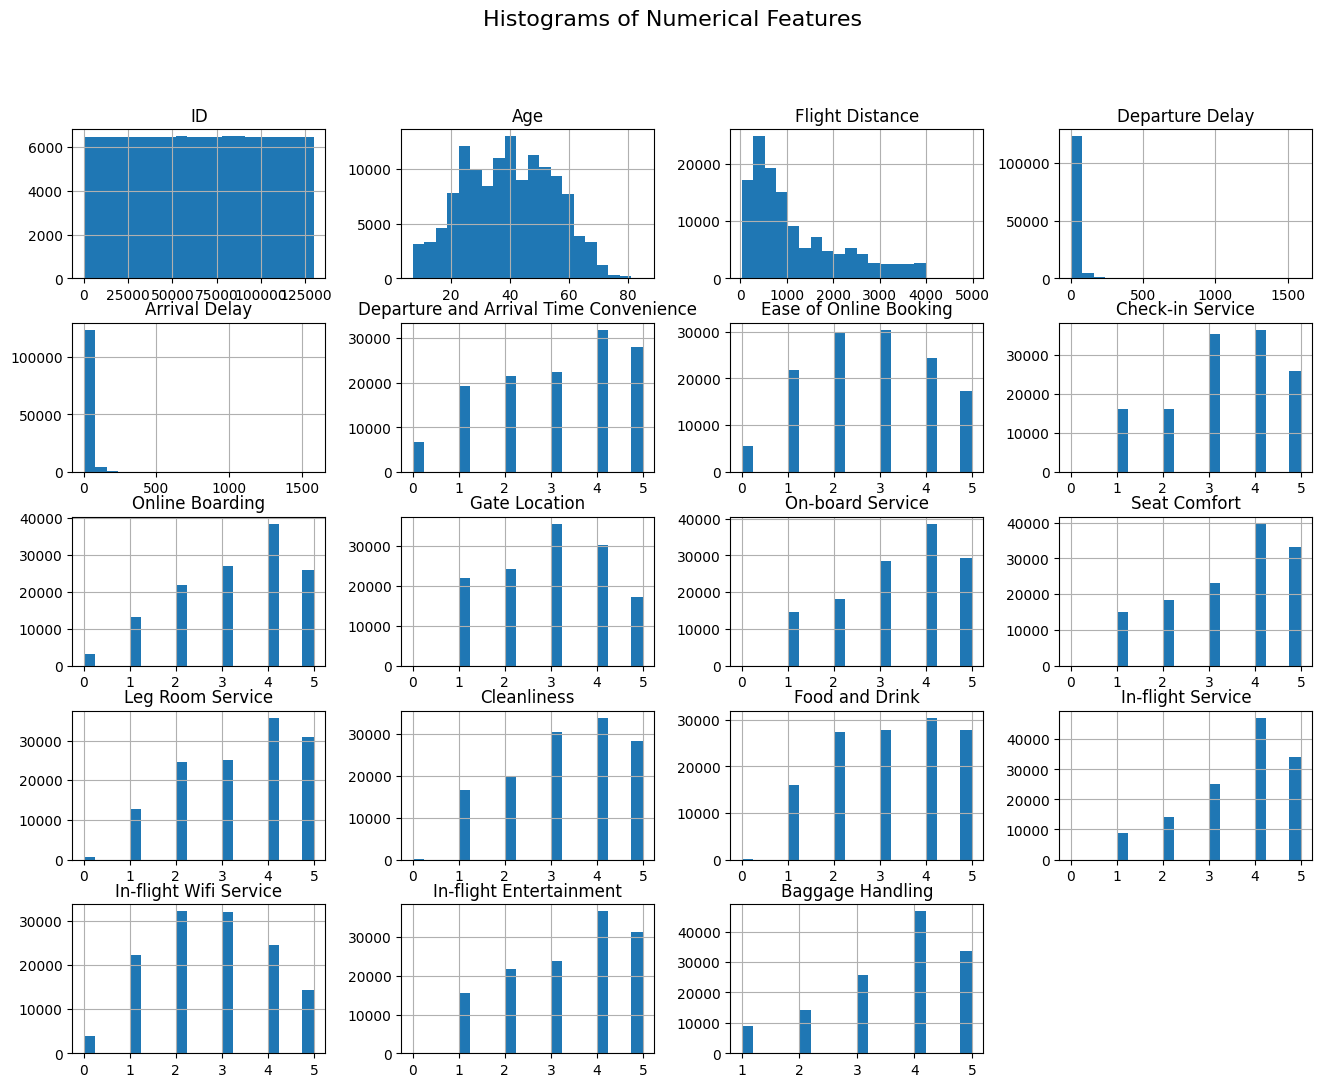

In [7]:
# Plot histograms to check distributions of numerical columns
# Histograms help visualize how the data is distributed (normal, skewed, etc.)
df[numerical_columns].hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

Explanation:

Boxplots help identify outliers in the dataset. Outliers can distort the analysis, so it's important to detect and handle them.


# **Skewness Analysis**

In [8]:
# Step 6: Analyze skewness of numerical columns
# Skewness values can help decide if transformations are needed (e.g., log, sqrt)
# Check skewness of numerical columns
skewness_values = df[numerical_columns].apply(lambda x: skew(x.dropna()))
high_skew = skewness_values[skewness_values > 0.5]
print(f"Highly skewed columns:\n{high_skew}")

Highly skewed columns:
Flight Distance    1.108420
Departure Delay    6.853499
Arrival Delay      6.670047
dtype: float64


Skewness after transformation:
Flight Distance   -0.205314
Departure Delay    0.918754
Arrival Delay      0.871549
dtype: float64


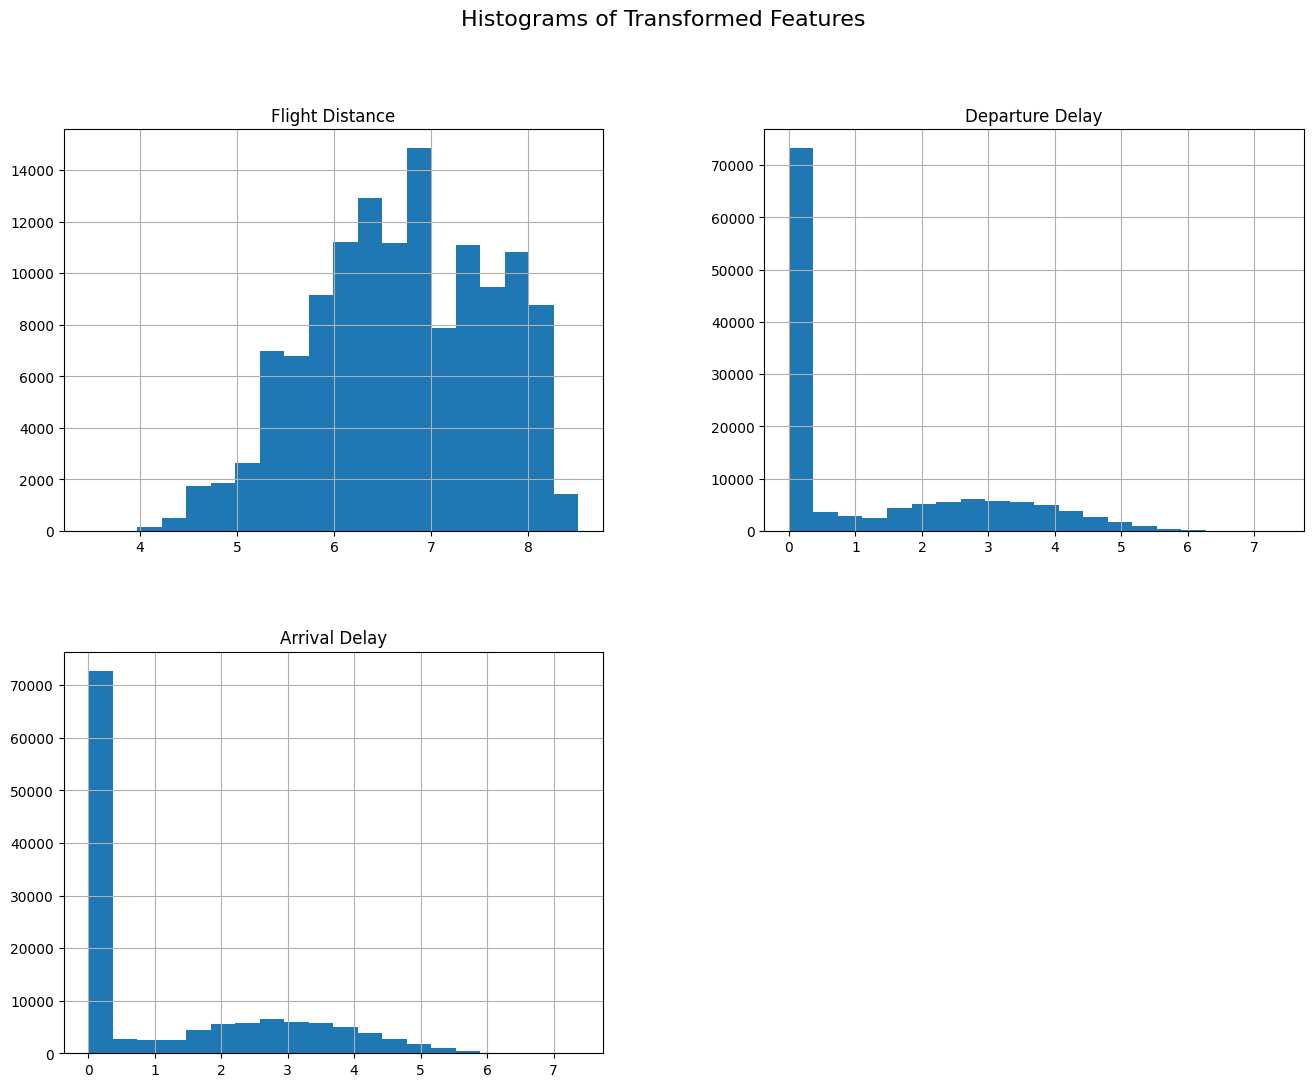

In [9]:
# Step 7: Apply log transformation to reduce skewness (for positive skewness)
high_skew_columns = high_skew.index
df[high_skew_columns] = df[high_skew_columns].apply(lambda x: np.log1p(x))

# Recheck skewness after transformation
new_skewness = df[high_skew_columns].apply(lambda x: skew(x.dropna()))
print(f"Skewness after transformation:\n{new_skewness}")

# Optional: Plot histograms of the transformed data
df[high_skew_columns].hist(figsize=(16, 12), bins=20)
plt.suptitle('Histograms of Transformed Features', fontsize=16)
plt.show()

Explanation:

Checking for missing values helps identify gaps in the data. Boxplots highlight outliers. Histograms provide insights into data distribution. Skewness indicates whether data is skewed, informing the need for normalization or transformation.

# **3. Exploratory Data Analysis (EDA)**

EDA helps us understand the underlying patterns and relationships between features. We'll use various plots to explore the data.
Correlation Matrix

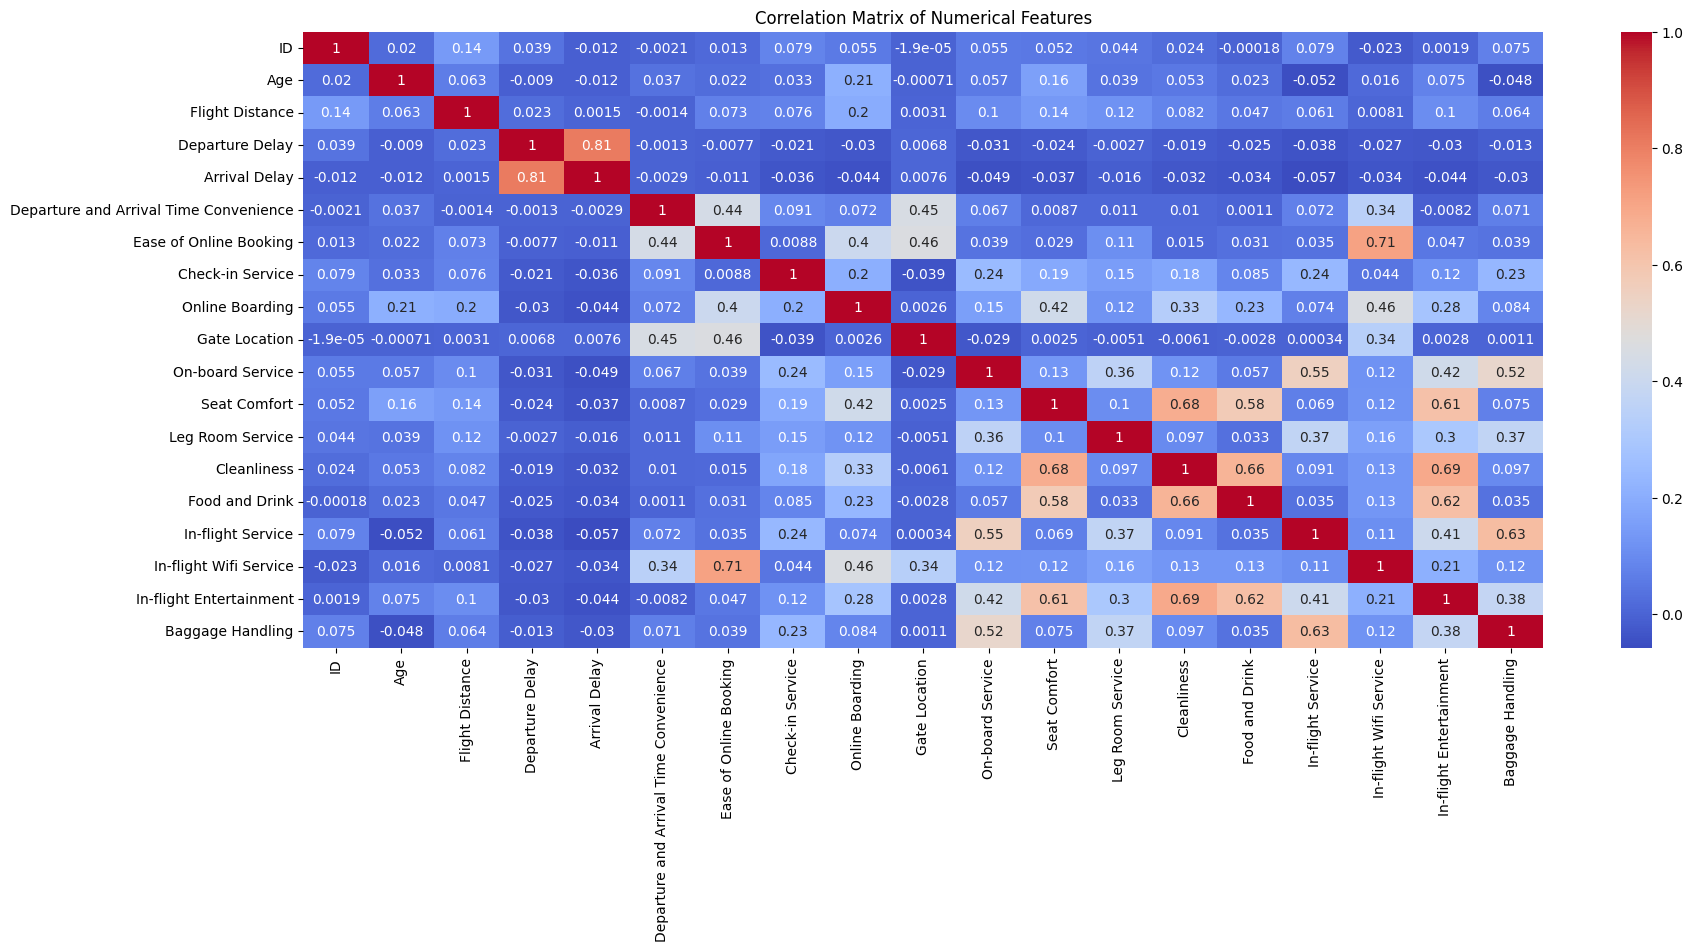

In [10]:
# Step 7: Correlation Matrix for numerical variables
# This heatmap will help you understand relationships between numerical features
plt.figure(figsize=(20,8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Explanation:

A heatmap of the correlation matrix shows the relationships between numerical features and helps identify multicollinearity.

# **Distribution of categorical variables**

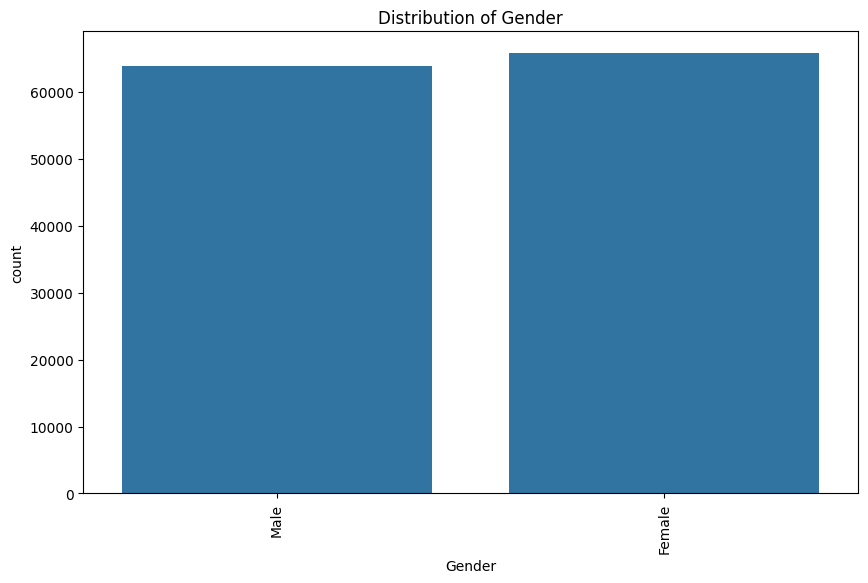

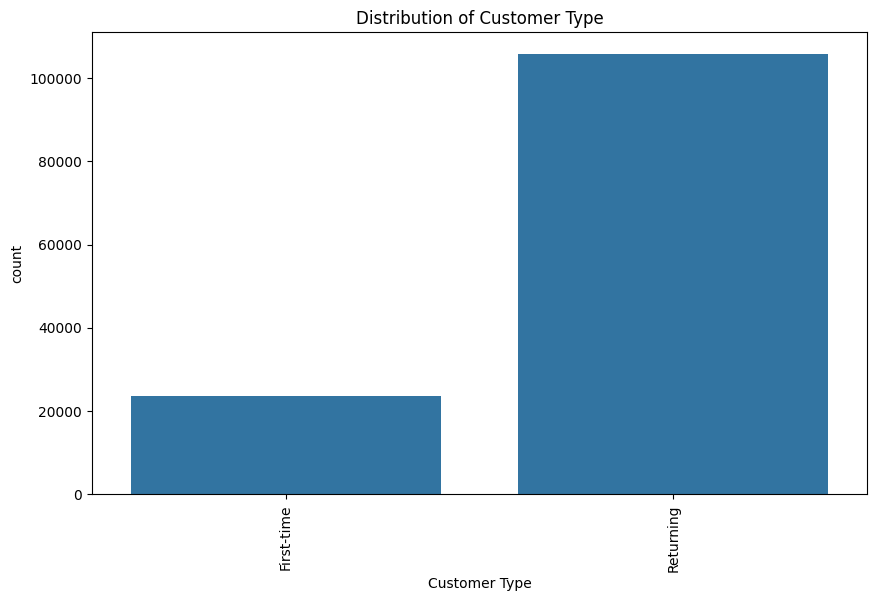

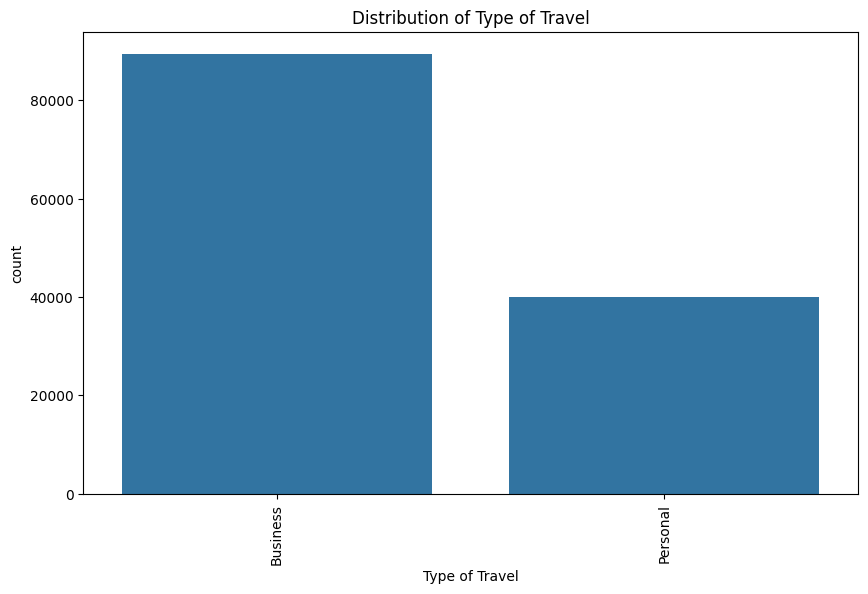

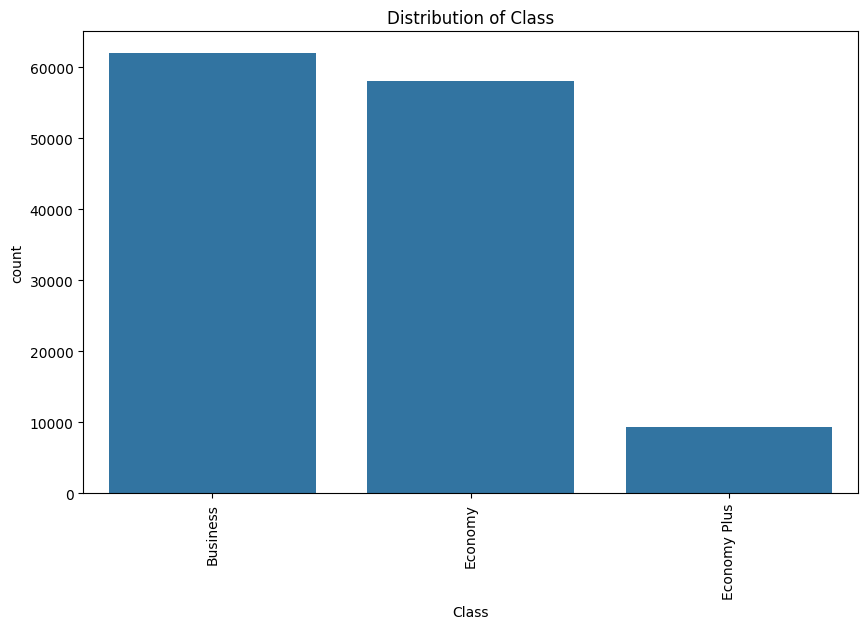

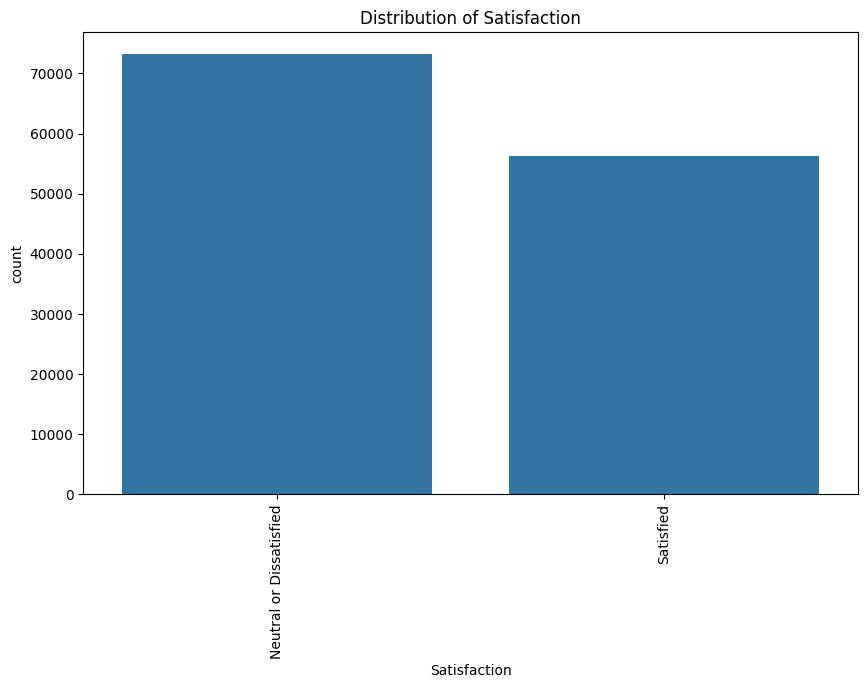

In [11]:
# Step 8: Distribution of categorical variables
# Bar plots show the distribution of categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

Explanation:

Checking for missing values helps identify gaps in the data. Boxplots highlight outliers. Histograms provide insights into data distribution. Skewness indicates whether data is skewed, informing the need for normalization or transformation.



# **Encoding Categorical Variables**

In [12]:
# Step 9: Encode categorical features before feature selection
# Use LabelEncoder for encoding categorical columns


from sklearn.preprocessing import LabelEncoder


# Find categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns


# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
   le = LabelEncoder()
   df[col] = le.fit_transform(df[col])
   label_encoders[col] = le  # Save the encoder if you need it later


Explanation: LabelEncoder is used to convert categorical features into numerical values for modeling.

In [13]:
# Step 10: Define features (X) and target (y)
# Assuming 'Satisfaction' is the target column
X = df.drop(columns='Satisfaction')  # Features (all columns except the target)
y = df['Satisfaction']  # Target variable


# **Feature Selection**


**SelectKBest Feature Selection**

In [14]:
# Step 11: Select the top 10 features using SelectKBest with chi-squared test
select_k_best = SelectKBest(chi2, k=10)
X_new = select_k_best.fit_transform(X, y)


# Check which features were selected
selected_features = select_k_best.get_support(indices=True)
X_selected = pd.DataFrame(X_new, columns=X.columns[selected_features])
print(X_selected.head())


    ID   Age  Type of Travel  Class  Online Boarding  On-board Service  \
0  1.0  48.0             0.0    0.0              3.0               3.0   
1  2.0  35.0             0.0    0.0              5.0               5.0   
2  3.0  41.0             0.0    0.0              5.0               3.0   
3  4.0  50.0             0.0    0.0              4.0               5.0   
4  5.0  49.0             0.0    0.0              5.0               3.0   

   Seat Comfort  Leg Room Service  In-flight Wifi Service  \
0           5.0               2.0                     3.0   
1           4.0               5.0                     2.0   
2           5.0               3.0                     4.0   
3           5.0               5.0                     2.0   
4           4.0               4.0                     3.0   

   In-flight Entertainment  
0                      5.0  
1                      5.0  
2                      3.0  
3                      5.0  
4                      3.0  


Explanation: SelectKBest is used to select the top 10 most important features based on the chi-squared test.

**Train-Test Split and Scaling**

In [15]:
# Step 12: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [16]:
# Step 13: Apply MinMaxScaler to scale only the features (X)
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Explanation: The data is split into training and test sets and scaled using MinMaxScaler.

# **4.Model Training and Evaluation**

**Training Multiple Models**

In [17]:
# Step 14: Train and Evaluate Multiple Models
models = {
   "RandomForest": RandomForestClassifier(random_state=42),
   "LogisticRegression": LogisticRegression(max_iter=500),
   "SVM": SVC(),
   "XGBoost": XGBClassifier(eval_metric='mlogloss')
}


for model_name, model in models.items():
   print(f"\nTraining {model_name}...")
   model.fit(X_train_scaled, y_train)

   # Predictions and evaluation
   y_pred_train = model.predict(X_train_scaled)
   y_pred_test = model.predict(X_test_scaled)

   # Train/Test accuracies
   train_accuracy = accuracy_score(y_train, y_pred_train)
   test_accuracy = accuracy_score(y_test, y_pred_test)

   print(f"{model_name} Train Accuracy: {train_accuracy}")
   print(f"{model_name} Test Accuracy: {test_accuracy}")

   # Overfitting Check (if train accuracy is significantly higher than test accuracy)
   if train_accuracy - test_accuracy > 0.05:
       print(f"Potential overfitting detected in {model_name}. Consider tuning or applying regularization.")

   print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred_test))





Training RandomForest...
RandomForest Train Accuracy: 1.0
RandomForest Test Accuracy: 0.9455170283419569
Potential overfitting detected in RandomForest. Consider tuning or applying regularization.
Classification Report for RandomForest:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14685
           1       0.95      0.92      0.94     11213

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.94     25898
weighted avg       0.95      0.95      0.95     25898


Training LogisticRegression...
LogisticRegression Train Accuracy: 0.8527063684368031
LogisticRegression Test Accuracy: 0.8519190671094293
Classification Report for LogisticRegression:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     14685
           1       0.83      0.82      0.83     11213

    accuracy                           0.85     25898
   macro avg       0.85      0

Explanation:

This code systematically trains and evaluates four different models on your dataset.
It checks for overfitting and prints the classification report for each model.
This allows you to compare models and make informed decisions about which one to tune further or deploy.

**RandomForestClassifier using RandomizedSearchCV**

In [18]:
#step 15: RandomForestClassifier using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
   'n_estimators': [100, 200, 300],
   'max_depth': [5, 10, 15],  # Limit the depth of trees
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['sqrt', 'log2']
}


rf = RandomForestClassifier(random_state=42)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                     n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train_scaled, y_train)
print("Best parameters for RandomForest:", rf_random_search.best_params_)


best_rf = rf_random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


Explanation:


Hyperparameter Tuning: It’s crucial to optimize hyperparameters to improve model performance. Default settings often aren’t ideal, and tuning allows the model to better balance the trade-offs between bias and variance.
RandomizedSearchCV: Offers a faster, more efficient way to explore hyperparameter space than exhaustive search methods like GridSearchCV.
Cross-validation: Ensures the model's performance is consistent across different subsets of the data, preventing overfitting.

**Hyperparameter Tuning**


In [23]:
# step :16 Using the best parameters from RandomizedSearchCV
best_rf = RandomForestClassifier(
   n_estimators=200,
   min_samples_split=2,
   min_samples_leaf=1,
   max_features='sqrt',
   max_depth=15,
   random_state=42
)


**Retraining the Tuned RandomForest Model**

# **5.Final Model Evaluvation**

In [20]:
# step 17: Retrain the RandomForest model with the best parameters
print("\nTraining RandomForest with tuned hyperparameters...")
best_rf.fit(X_train_scaled, y_train)


# Evaluate the tuned RandomForest model
y_pred_train_rf = best_rf.predict(X_train_scaled)
y_pred_test_rf = best_rf.predict(X_test_scaled)


# Train/Test accuracies
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)


print(f"Tuned RandomForest Train Accuracy: {train_accuracy_rf}")
print(f"Tuned RandomForest Test Accuracy: {test_accuracy_rf}")


# Check for overfitting
if train_accuracy_rf - test_accuracy_rf > 0.05:
   print(f"Potential overfitting detected in RandomForest even after tuning.")


# Classification report
print(f"Classification Report for Tuned RandomForest:\n", classification_report(y_test, y_pred_test_rf))


# Cross-Validation
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5)
print(f"Tuned RandomForest Cross-validation mean accuracy: {cv_scores_rf.mean()}")



Training RandomForest with tuned hyperparameters...
Tuned RandomForest Train Accuracy: 0.963403450173281
Tuned RandomForest Test Accuracy: 0.9476021314387212
Classification Report for Tuned RandomForest:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     14685
           1       0.95      0.92      0.94     11213

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.95     25898
weighted avg       0.95      0.95      0.95     25898

Tuned RandomForest Cross-validation mean accuracy: 0.9460174181409762


Explanation of the Code (Retraining and Evaluating the Tuned RandomForest Model)
This section of the code focuses on retraining the RandomForest model with the best hyperparameters found via RandomizedSearchCV and evaluating the model's performance on the training and test datasets. It also checks for overfitting and calculates cross-validation scores.

# **6.Model Evaluation and Feature Importance**

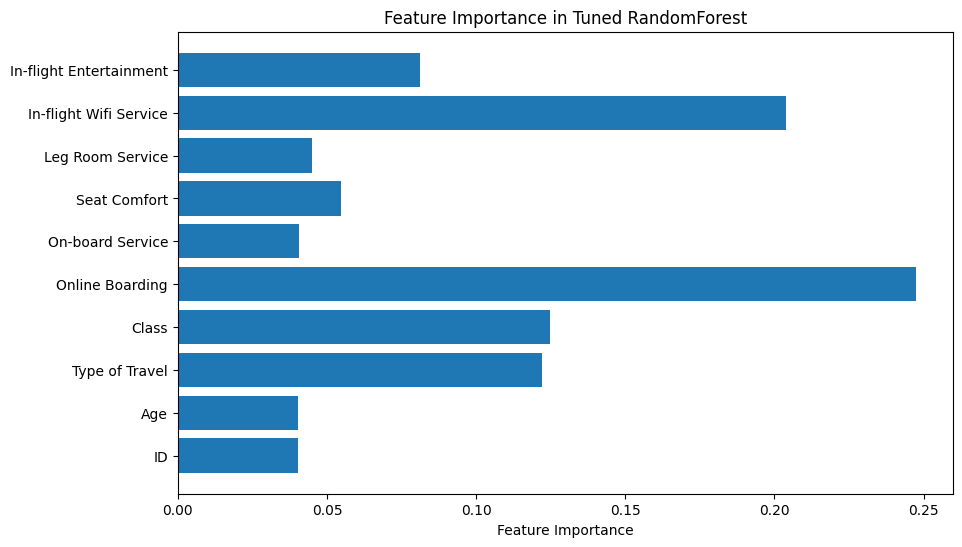

In [21]:
#step : 18 Model Evaluation and Feature Importance
import matplotlib.pyplot as plt
importances = best_rf.feature_importances_
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names


plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Tuned RandomForest')
plt.show()


Why Feature Importance Visualization Matters:


Understand Model Behavior: You can see how the model makes its decisions and which features it relies on most.
Improve Model Interpretability: It helps explain the model's behavior to stakeholders, increasing trust and transparency.
Feature Selection: Helps remove irrelevant or redundant features to simplify the model, potentially improving generalization and reducing overfitting.
Business Insights: Provides actionable insights, allowing domain experts to focus on the factors that matter most.
Debugging and Refinement: If the model is not working as expected, feature importance can highlight potential issues with the data or model.


**Saving the Tuned RandomForest Model**

In [22]:
#step 19: Saving the Tuned RandomForest Model
import joblib
joblib.dump(best_rf, 'final_tuned_random_forest_model.pkl')




['final_tuned_random_forest_model.pkl']

# **7.Conclusion**


This project successfully developed a machine learning model to predict airline passenger satisfaction. We performed data preprocessing, feature selection, and model training using multiple algorithms. By tuning the hyperparameters of the RandomForestClassifier, we achieved a highly accurate and generalized model. Analyzing feature importance provided further insights into which factors most influence passenger satisfaction. The saved model can now be used in a production environment for real-time predictions.